## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

The motivation for this project was a desire to help countries predict life expectancy. Both members in the group wanted to do a project with some type of social impact, and we believed that understanding what factors influence life expectancy will be a valuable tool in helping to prolong life. There is no technical backgruond assumed in this report as the mode is based on commonly reported government statistics. 

## Problem statement 

Describe your problem statement. Articulate your objectives using absolutely no jargon. Interpret the problem as inference and/or prediction.

Life expectancy greatly varies on a country by country basis, and forecasting life expectancy is a useful tool for managing pensions, managing the econonomy at large, and is a factor in HDI. The objective of this study is to create a model that accurately predicts life expectancy based on commonly reported government statistics. 

There was an inferential element added to the report after the initial problem statement was articulated. We believed the inference to be just as valuable as the prediction. 

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

The data we used is from the World Health Organization, but was compiled on Kaggle. https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

The data keeps track of statistics from 193 countries, which is the exact number of fully recognized UN member states. Because this data is compiled by the WHO, we are confident that there are not errors. There are 22 predictors in the full dataset, but we, of course, did not use all 22 predictors in our model. 

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

The stakeholders of this analysis are world governments and the people of the world at large. Our model will help governments manage aspects of governence that rely on a useful measure of population, something that a life expectancy prediciton is needed for. The inferential part of the analysis will help governments make more informed decisions on what factors most influence life expectancy. 

## Data quality check / cleaning / preparation 

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

If the tables in this section take too much space, you may put them in the appendix, and just mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your final model(s).

## Exploratory data analysis

Put the relevant EDA here (visualizations, tables, etc.) that helped you figure out useful predictors for developing the model(s). Only put the EDA that ended up being useful towards developing your final model(s). 

List the insights (as bullet points) you got from EDA that ended up being useful towards developing your final model. 

Again, if there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

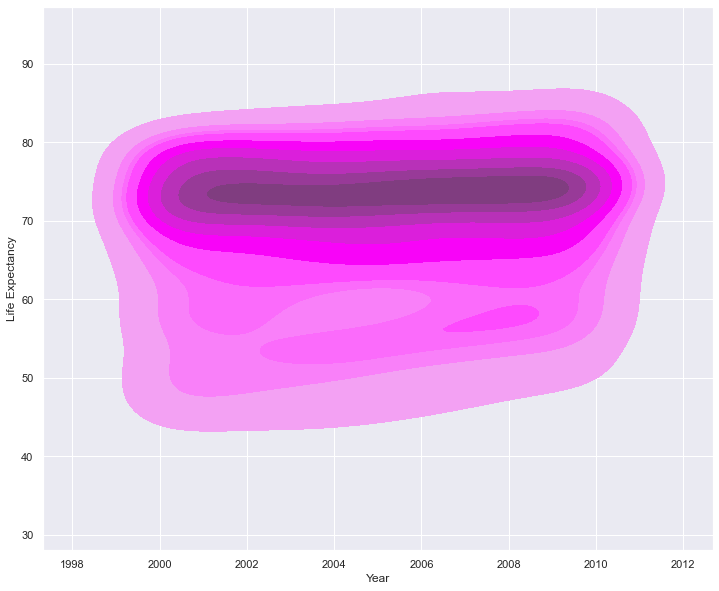

- The KDE was used to illustrate a general understanding of life expectancy. It was not extremely informative, but it did illustrate that the lower bound of life expectancy dramatically increased relative to the upper bound. 

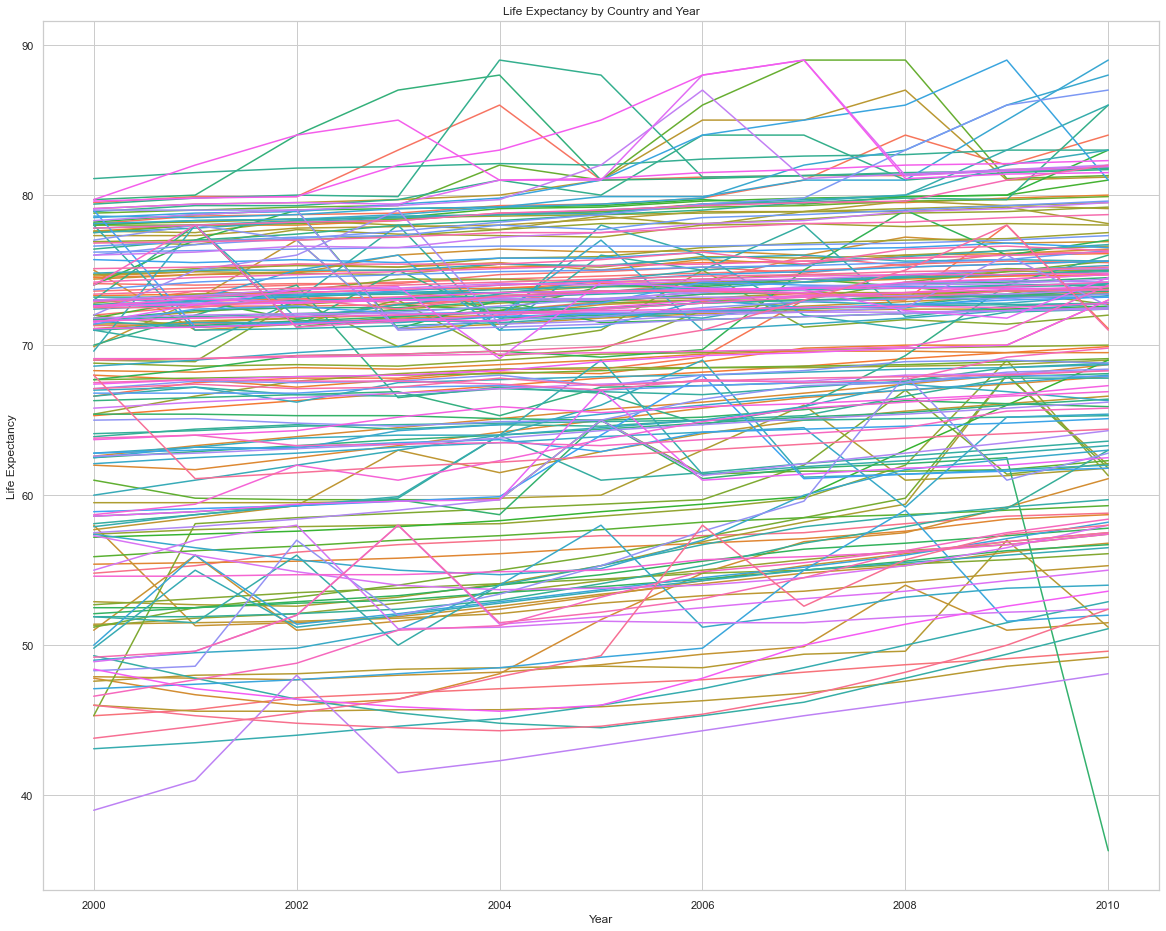

- This data was overwhelming, but it helped to show that life expectancy could fluctuate dramatically. This is why the five year lag was added.¶

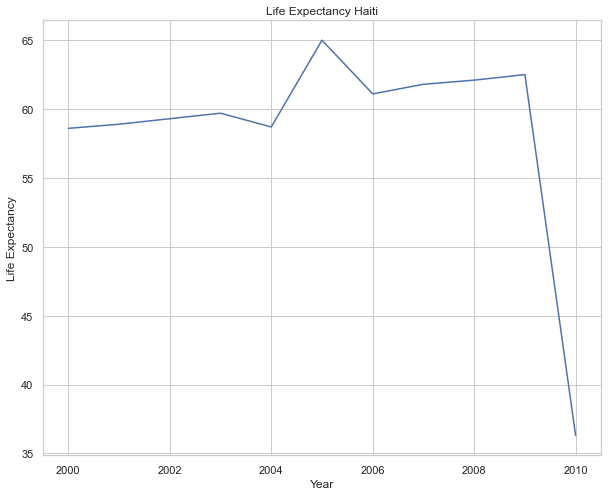

- Due to an earthquake in 2010, Haiti's life expectancy fell by nearly thirty years in one year. Haiti's life expectancy rebounded the next year, but it is in the test dataset. This is another reason a five year lag was added.

## Approach

What kind of a model (linear / logistic / other) did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? Did the very first model you tried work? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction / inference?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

We used a linear model that optimized test RMSE. 

We weren't forecasting any problems in particular, but a notable problem that still persists, to an extent, is that the model prioritizes overall RMSE so the variance of residuals is very high in early years, and is very narrow in later years. We suspect that this could be mitigated with k-fold CV, and that will need to be investigated. 

We developed an unorthodox approach of taking an average of all values to find the best predictors, and later expanded the model once again to fully realize it as a time series model. The time series model included a one year and five year lag, as is common in autocorrelation. 

## Developing the model

Explain the steps taken to develop and improve the base model - informative visualizations / addressing modeling assumption violations / variable transformation / interactions / outlier treatment / influential points treatment / addressing over-fitting / addressing multicollinearity / variable selection - stepwise regression, lasso, ridge regression). 

Did you succeed in achieving your goal, or did you fail? Why?

**Put the final model equation**.

**Important: This section should be rigorous and thorough. Present detailed information about decision you made, why you made them, and any evidence/experimentation to back them up.**

The base model was improved multiple times. We first narrowed the selection of predictors manually, by looking at highly correlated variables, and variables with high multicolinearity. After this, we used a best subset selection model to further narrow the predictors. We then took the average of all the values in the time series, ran the best subset again, and used those final predictors in the model. 

Ridge regression was then utilized to find the inferential relations of the predictors. Ridge regression was used as it requires standardized variables and addresses overfitting. 

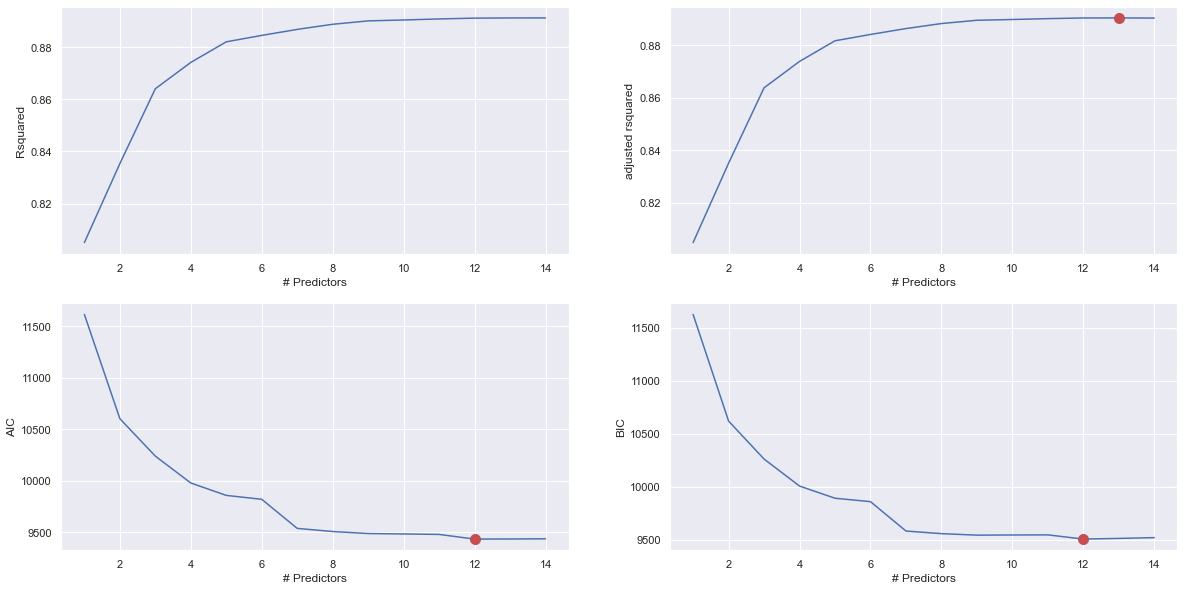

Interestingly, the first best subset gave us a nearly full model with 12/14 predictors chosen. This gave us confidence that the techniques we used to narrow the model from 22 to 14 variables initially was successful. Once these 14 predictors were selected, the average values, as mentioned, were used to select the final predictors. Part of the reason we decided to due this is that we noticed variables such as polio, diptheria, and HIV_AIDS were correlated as they all tracked various deadly diseases. We got rid polio as it was highly correlated with HIV and diptheria. 

In our final model , nearly every variable had a p-value of 0.000 and everyone had a p-value of less than 0.002. This made us extremely confident in our variable selection. 

Every model suffered from a strange phenomenon where the residuals got better over time. We tried addressing this with k-fold cross validation, but it didn't seem to make a significant difference. The ridge regression made that issue of variance worse, which is why it was not used for our final model. We did not consider variable interactions in the model as our model already was succesful and we didn't want to introduce the possibility of overfitting. 

The final model equation is: 

life_expectancy = -0.0076*adult_mortality + 0.5312*schooling + 0.0003*percentage_expenditure + 0.3221*BMI - 0.0320*HIV_AIDS + 3.3355*income_composition_of_resources + 0.4915*life_expectancy_lag_one_year + -0.0444*life_expectancy_lag_5_year

## Limitations of the model with regard to inference / prediction

If it is inference, will the inference hold for a certain period of time, for a certain subset of population, and / or for certain conditions.

If it is prediction, then will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

The inferential capabilities of our model are independent of time. This is because we took the average of all the data given in order to compute the coeeficients of the standardized variables. 

The prediction part of our model is accurate, but will become much more accurate if given more data. For example, if the given data expanded to the 1960's and early 2020's, the model would be much more informed to make predictions into the late 2020's. 

The predictors in our model are commonly reported government statistics, and therefore should not be too difficult/expensive for stakeholders to collect the data, given that the major stakeholder is the government. 

The stakeholder should be able to predict life expectancy within the next five years. 

Granted that the predictors are still relevant in the future, the model will never become obsolete. That is a bold assumption, however. We predict that this model will be useful for the next 10-20 years. Once countries become more equal in these regards, the growth in life expectancy should come from high income countries expanding life expectancy through medication, and lifestyle, predictors not present in the mode. We have read that some models predict humans can life to 120 years old, and our model will not be able to handle that situation. In the near future, however, out model will be extremely useful for governments aruond the world. 

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? If it is inference you may draw conclusions based on the coefficients, statistical significance of predictors / interactions, etc. If it is prediction, you may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

## GitHub and individual contribution {-}

Put the **Github link** for the project repository.

Add details of each team member's contribution in the table below.

https://github.com/blankajarmoszko/STAT303-2_JEB

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Jack O'Keefe</td>
    <td>EDA, Model Creation, Data Preparation</td>
    <td>Ran final model with time series predictions, ran ridge regression, and created visualizations for model accuracy and EDA.</td>
    <td>4</td>
  </tr>
  <tr>
    <td>Blanka Jarmoszko</td>
    <td>Data Cleaning, Data Preparation, Model Creation</td>
    <td>UPDATE</td>
    <td>4</td>
    </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

Both members are comfortable using GitHub. GitHub made collaboration easier as we did not have to email/text code to each other. 

## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.